In [1]:
# include the power socket setup, base classes and helpers
# (see PowerSocketSystem.py)
from PowerSocketSystem import *

## The Epsilon-Greedy Algorithm (ε-Greedy)

As we've seen, a pure Greedy strategy has a very high risk of selecting a sub-optimal socket and sticking with this selection. As a result, the best socket will never be found. 

A simple way to overcome this problem is by introducing an element of exploration. This is exactly what Epsilon-Greedy does: 

* By default, actions are chosen greedily. The action with the highest estimated reward is the selected action.

* However, at each time step, an action may instead be selected at random from the set of all possible actions. A random action is chosen with a probability 'ε' (Epsilon). 

In this way exploration is added to the standard Greedy algorithm. Over time every action will be sampled repeatedly to give an increasingly accurate estimate of its true reward value.

The code to implement the Epsilon-Greedy strategy is shown below. At each time step 'select_socket' is called. If the random value 'p' is less than Epsilon then a random action will be chosen, otherwise the socket with the highest current estimated reward will be selected.

In [2]:
class EpsilonGreedySocketTester( SocketTester ):

    def __init__(self, epsilon = 0. ):  
        
        # create a standard socket tester
        super().__init__() 
        
        # save the probability of selecting the non-greedy action
        self.epsilon = epsilon
    
    
    def select_socket( self, t ):
        """ Epsilon-Greedy Socket Selection"""
        
        # probability of selecting a random socket
        p = np.random.random()

        # if the probability is less than epsilon then a random socket is chosen from the complete set
        if p < self.epsilon:
            socket_index = np.random.choice(self.number_of_sockets)
        else:
            # choose the socket with the current highest mean reward or arbitrary select a socket in the case of a tie            
            socket_index = random_argmax([socket.sample() for socket in self.sockets])               
        
        return socket_index

Looking at the graphs below, it can be seen how the value of ε affects exploration and exploitation on the socket problem:

* With an ε value of zero this is just the Greedy algorithm. Each socket is chosen with an equal probability. No sockets are ever selected at random and there is no exploration.

* As ε increases, so the random selection of actions increases and, consequently, exploration increases. Initially this results in the optimal socket being located and selected with increasing frequency. At the same time, the non-optimal sockets begin to be selected less often. 

* The selection of the optimal socket, and the corresponding rise in the mean total reward, continues up to an ε value of approximately 0.2. This point represents the peak in the exploration\exploitation trade-off. Exploration is finding the best action to take and exploitation is selecting this action.

* After the peak in the selection of the optimal socket the balance between exploration and exploitation starts to shift in favour of exploration. The chances of a socket being chosen at random becomes increasingly likely. As a result, non-optimal sockets begin to be chosen more frequently and so the mean total reward begins to fall. 

* The increase in the random selection of sockets continues until ε has a value of 1, at which point the algorithm has switched to become a pure exploration strategy with no exploitation. Sockets are once again chosen purely at random and each socket is chosen with equal probability, irrespective of its estimated reward.

In [3]:
# create and test epsilon-greedy sockets
tester = EpsilonGreedySocketTester( epsilon = 0.1 )
tester.run( number_of_steps = 1000 )

print(f'Mean Reward per Time Step = {tester.get_mean_reward()}')
print(f'Optimal Socket Selected = {tester.get_optimal_socket_percentage()}')
print(f'Socket Percentages = {tester.get_socket_percentages()}')

Mean Reward per Time Step = 11.420428123460079
Optimal Socket Selected = 0.871
Socket Percentages = [0.043 0.016 0.047 0.871 0.023]


In [4]:
def plot_epsilon_greedy_socket_percentages( epsilon_values, socket_percentages, number_of_steps ):

    df = pd.DataFrame(socket_percentages)
    for socket in range(df.shape[1]):
        plt.plot(epsilon_values, df[socket]*100, label = f'{socket+1}', marker='o', linestyle='--')           

    plt.plot(epsilon_values, np.ones(df.shape[0])*20,'k')

    plt.legend(title = 'Sockets')
    plt.title('Socket Selection Percentage vs Epsilon', fontsize=15)
    plt.xlabel('Epsilon')
    plt.ylabel('Socket Selection (%)')
     
def plot_epsilon_greedy_final_socket_estimates( epsilon_values, final_socket_estimates, number_of_steps ):    
    df = pd.DataFrame(final_socket_estimates)
    for socket in range(df.shape[1]):
        plt.plot(epsilon_values, df[socket], label = f'{socket+1}', marker='o', linestyle='--')           

    plt.legend(title = 'Sockets')
    plt.title('Final Socket Estimate vs Epsilon', fontsize=15)
    plt.xlabel('Epsilon')
    plt.ylabel('Final Socket Estimate')    
    
def plot_epsilon_greedy_reward_per_timestep( epsilon_values, reward_per_timestep, number_of_steps, figsize=(10,8) ):
    
    plt.plot( epsilon_values, reward_per_timestep, marker='o', linestyle='--', color='r') 
    plt.title('Mean Total Reward per Time Step vs Epsilon', fontsize=15)
    plt.xlabel('Epsilon')
    plt.ylabel('Mean Total Reward per Time Step')  
    
    
def plot_epsilon_greedy(epsilon_values, reward_per_timestep, optimal_selected, socket_percentages, final_socket_estimates, number_of_steps ):
    fig = plt.figure(figsize=(26,5))

    plt.suptitle(f'Epsilon Greedy: {number_of_steps} time-steps per run', fontsize=20, fontweight='bold')

    plt.subplot(1, 3, 1)
    plot_epsilon_greedy_socket_percentages( epsilon_values, socket_percentages, number_of_steps )

    plt.subplot(1, 3, 2)
    plot_epsilon_greedy_reward_per_timestep( epsilon_values, reward_per_timestep, number_of_steps )

    plt.subplot(1, 3, 3)
    plot_epsilon_greedy_final_socket_estimates( epsilon_values, final_socket_estimates, number_of_steps )

    plt.savefig(f"epsilon_greedy_{number_of_steps}.png")

    plt.show()   

In [15]:
def epsilon_greedy_experiment( number_of_tests, number_of_steps, epsilon = 0.):    
    
    experiment = SocketExperiment(socket_tester   = EpsilonGreedySocketTester( epsilon ),
                                  number_of_tests = number_of_tests,
                                  number_of_steps = number_of_steps)
    experiment.run()
    
    return experiment.get_estimates(),\
           experiment.get_reward_per_timestep(),\
           experiment.get_optimal_selected(),\
           experiment.get_socket_percentages()

In [16]:
def run_epsilon_greedy_experiment( start, end, step = 0.01, number_of_tests = 100, number_of_steps = 300 ):     

    test_values = []
    reward_per_timestep = []
    optimal_selected = []
    socket_percentages = []
    final_socket_estimates = []
        
    # iterate over the epsilon values
    for epsilon in tqdm( np.arange( start, (end+step), step ) ):
        
        # save the test value used to run this test
        test_values.append( epsilon )
        
        mean_estimates, mean_reward_per_timestep, mean_optimal_selected, mean_socket_percentage = epsilon_greedy_experiment( number_of_tests, number_of_steps, epsilon )                           
                
        reward_per_timestep.append( mean_reward_per_timestep )
        optimal_selected.append( mean_optimal_selected )
        socket_percentages.append( mean_socket_percentage ) 
        final_socket_estimates.append( mean_estimates[-1] )
     
    return test_values, reward_per_timestep, optimal_selected, socket_percentages, final_socket_estimates                    

100%|██████████| 21/21 [00:41<00:00,  2.00s/it]


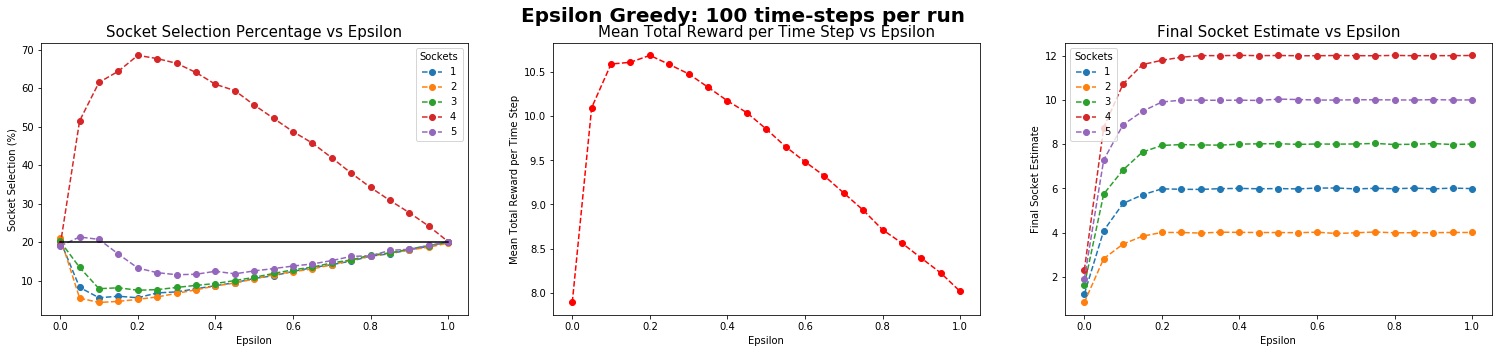

In [17]:
# how many times each test should be run
number_of_tests = 500

# the epsilon test range
start = 0
stop = 1.0
step = 0.05

number_of_steps = 100
epsilon_values, reward_per_timestep, optimal_selected, socket_percentages, final_socket_estimates = \
    run_epsilon_greedy_experiment( start, stop, step, number_of_tests, number_of_steps )  

plot_epsilon_greedy(epsilon_values, reward_per_timestep, optimal_selected, socket_percentages, final_socket_estimates, number_of_steps )

The Epsilon-Greedy strategy is an easy way to add exploration to the basic Greedy algorithm. Due to the random sampling of actions, the estimated reward values of all actions will converge on their true values. This can be seen in the graph of Final Socket Estimates shown above. With ε values higher than about 0.2, the estimated socket values all match their true values. And this is also the downside of the Epsilon-Greedy algorithm: non-optimal actions continue to be chosen, and their reward estimates refined, long after they have been identified as being non-optimal. Consequently, exploitation of the optimal action isn't maximised and the total overall reward is less than it could be.

## Regret

In the socket selection problem the maximum possible reward would be obtained if the best socket was chosen at every time step. Every time a non-optimal socket is selected the total possible reward that can be obtained reduces further from this theoretical maximum. As a result you regret choosing this socket and wish instead that you'd chosen the best one. As the term regret implies, you may have no way to know in advance that you're making a non-optimal choice. Only in hindsight do you realise your mistake.

Although it may not be possible to tell in advance if you're choosing the best action, you can calculate how your selection policy performs when compared against the optimal policy, in which the best action is selected at every time step. The difference in the total reward obtained by these two policies represents the regret.
The optimal action is given by:


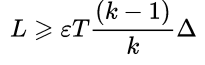


The optimal action is the one which maximises the expected (mean) reward when it is chosen at every time step.
The regret 'L' is calculated by taking the difference between the reward obtained by the implemented policy and the reward that would have been obtained if instead the optimal policy had been followed, over a total of 'T' time steps:

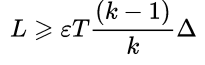

So, for all 'T' time steps, the optimal policy gets the expected reward obtained when taking the optimal action at every time step. From this we subtract the sum of the expected rewards returned from the actions chosen by our policy, where the chosen action, and therefore its expected reward, can vary at every time step.
By minimising the value of the regret we can maximise the sum of the rewards.


## Epsilon-Greedy Regret

Epsilon-Greedy implements exploration by choosing any of the possible actions, at random, with a probability 'ε'. Therefore, over the course of 'T' time steps, 'εT' of the actions will have been chosen randomly. 

Additionally, in a general form of the socket selection problem, there are 'k' different sockets to choose from and only one of these will give the maximum possible reward. The remaining 'k-1' sockets will give a sub-optimal reward. As a result, there are 'εT(k-1)/k' rounds in which a sub-optimal socket is selected. 

If, during the rounds when the sub-optimal action is chosen we get lucky and instead choose the second best socket, where the reward differs by a fixed amount 'Δ' (delta) from the best socket, then this will give us the lowest possible regret for Epsilon-Greedy. This is given by:

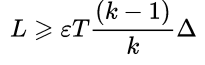

For all other non-optimal sockets the regret will be higher than 'Δ', hence the greater than or equal to sign. 

Since 'ε', 'Δ' and 'k' are all constants, the resultant lowest bounds regret for Epsilon-Greedy is linear with time. Meaning that the regret will continue to increase long after the optimal action has been found.